# CS121 - Class 3 Activity 

## This assignment is due by the start of class on Thursday.  

To submit your assignment, email a shareable google drive link of the completed notebook to cs-121-sp-19@cs.hmc.edu. 

In this activity you'll download three classes of images, train a classifier to distinguish them, and analyze the results. You should use a Chrome browser to grab your images. If you don't have a Chrome browser, download and install one. You will also need to enable the Download All Images extension. (Google for instructions on how to do this if you don't know or can't remember.)

## 1. Choose image categories

In a Chrome browser, go to [Google Images](http://images.google.com) and search for the images you are interested in.
In the space below, describe the three categories you've chosen.

Answer:

## 2. Download images to your computer
 
In a Chrome browser, search for your first category of images. Scroll through until you've seen about 100 images then click the ZIP button in the Chrome toolbar. Find the zipped images in your Download folder; change the name to A.zip where A is the name of your category.

Repeat for the other two categories.

If, for some reason, that didn't work, describe what happened in the space below and then download the zipped images from today's activity page of our course web site.

Answer:

## 3. Upload images to Jupyter notebook

In the file viewer, navigate to the folder course-v3/nbs/dl1/data/. Create a new folder ABC, where A, B, and C are the names of your three categories. Move into the A folder and upload your A.zip file. Repeat for your B anc C categories.

Run the following code to do some setup. Replace A, B, and C with your category names.

In [6]:
from fastai.vision import *
import zipfile
classes = ['planes','trains','automobiles']
path = Path('data/ABC')

Now unzip the files using the following code.

In [4]:
for c in classes:
    myfile = c+'.zip'
    print(myfile)
    with zipfile.ZipFile(path/myfile,"r") as zip_ref:
        zip_ref.extractall(path/c)


trains.zip
automobiles.zip


OSError: [Errno 36] File name too long: 'data/ABC/automobiles/MV5BOTI3MWY5Y2YtMzdiNi00Njk2LWJiNzUtODcyNjMyNzY0ZTUzXkEyXkFqcGdeQXVyNzU1NzE3NTg._V1_SP3303300C000_CR6590200150_PIimdb-blackband-204-14TopLeft00_PIimdb-blackband-204-28BottomLeft01_CR00200150_PIimdb-bluebutton-bigBottomRight-1-1_ZAClip412316196verdenab82552552551_ZAon2520IMDb4114196verdenab72552552551_ZA00253A4516411436verdenab72552552551_PIimdb-HDIconMiniWhiteBottomLeft4-2_ZACars2413814176arialbd72552552551_.jpg'

## 4. Prune images

Use the verify_images command to eliminate any images that can't be open. Replace A, B, and c iin the following code with your categories.

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

planes


image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/ABC/planes/planes-banner-resize-final-new-right-01-1475620787.svg'>
trains


Image data/ABC/trains/trainsheader2_1200_589_int_s_c1.gif has 1 instead of 3 channels
automobiles


## 5. View data

In this section you will replicate the approach in lesson 2 to view your data.

In [8]:
import numpy
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
# If you already cleaned your data, run this cell instead of the one above
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [9]:
data.classes

['automobiles', 'planes', 'trains']

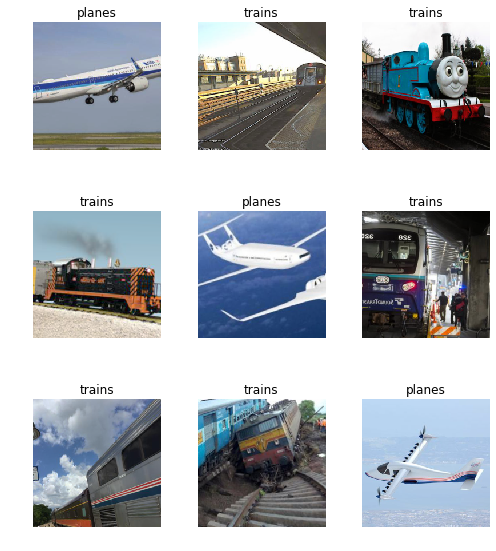

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['automobiles', 'planes', 'trains'], 3, 200, 50)

## 6.Train model

In this section you'll replicate the approach in lesson 2 to train your model.

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 79430622.59it/s]


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.355927,0.369632,0.080000
2,1.007568,0.085155,0.020000
3,0.773128,0.057916,0.000000
4,0.634245,0.069543,0.020000


In [15]:
learn.save('stage-1')

In [16]:
defaults.device = torch.device('cpu')

In [18]:
learn.export()

Object `.export()` not found.


In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


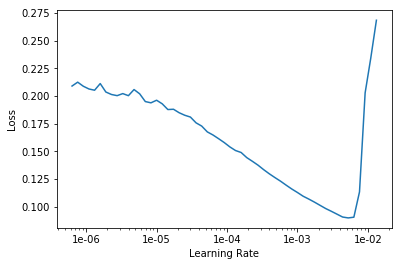

In [27]:
learn.recorder.plot()

Use the learning rate plot to choose a good slice of learning rates; i.e. replace low and high in the code below then run the code.

In [29]:
learn.fit_one_cycle(2, max_lr=slice(1e-03,5e-03))

epoch,train_loss,valid_loss,error_rate
1,0.073062,3.294142,0.420000
2,0.076141,3.015985,0.360000


In [32]:
learn.save('stage-2')

## 7.Interpretation

In this section you'll replicate the approach in lesson 2 to interpret your data.

In [33]:
learn.load('stage-2');

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

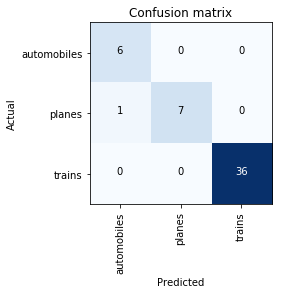

In [35]:
interp.plot_confusion_matrix()